#  常见网络模型

## torchvision.models 模块

* 图像分类
    图像分类，指的是单纯把一张图片判断为某一类
* 图像分割
* 物体检测
* 视频分类

## 实例化一个 GoogLeNet 网络

In [1]:

import torchvision.models as models
googlenet = models.googlenet()


/home/yc/anaconda3/envs/pytorch_p38/lib/python3.8/site-packages/torchvision/models/googlenet.py:47: FutureWarning: The default weight initialization of GoogleNet will be changed in future releases of torchvision. If you wish to keep the old behavior (which leads to long initialization times due to scipy/scipy#11299), please set init_weights=True.
  warnings.warn(


In [5]:

import torchvision.models as models
googlenet = models.googlenet(pretrained=True)

## 模型微调

**那什么是“fine-tuning”呢？**

**迁移学习，可以用已经在 ImageNet 数据集上训练好的模型来达成你的目的。**

**模型微调**，简单来说就是先在一个比较通用、宽泛的数据集上进行大量训练得出了一套参数，然后再使用这套预训练好的网络和参数，在自己的任务和数据集上进行训练。使用经过预训练的模型，要比使用随机初始化的模型训练效果更好，更容易收敛，并且训练速度更快，在小数据集上也能取得比较理想的效果。

In [6]:

import torch
import torchvision.models as models

# 加载预训练模型
googlenet = models.googlenet(pretrained=True)

# 提取分类层的输入参数
fc_in_features = googlenet.fc.in_features
print("fc_in_features:", fc_in_features)

# 查看分类层的输出参数
fc_out_features = googlenet.fc.out_features
print("fc_out_features:", fc_out_features)

# 修改预训练模型的输出分类数(在图像分类原理中会具体介绍torch.nn.Linear)
googlenet.fc = torch.nn.Linear(fc_in_features, 10)
'''
输出：
fc_in_features: 1024
fc_out_features: 1000
'''

fc_in_features: 1024
fc_out_features: 1000


'\n输出：\nfc_in_features: 1024\nfc_out_features: 1000\n'

## 其他常用函数

### make_grid

>torchvision.utils.make_grid(tensor, nrow=8, padding=2) 

* tensor：类型是 Tensor 或列表，如果输入类型是 Tensor，其形状应是 (B x C x H x W)；如果输入类型是列表，列表中元素应为相同大小的图片。
* nrow：表示一行放入的图片数量，默认为 8。
* padding：子图像与子图像之间的边框宽度，默认为 2 像素。

torch.Size([32, 1, 28, 28])


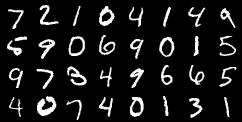

In [7]:

import torchvision
from torchvision import datasets
from torchvision import transforms
from torch.utils.data import DataLoader

# 加载MNIST数据集
mnist_dataset = datasets.MNIST(root='./data',
                               train=False,
                               transform=transforms.ToTensor(),
                               target_transform=None,
                               download=True)
# 取32张图片的tensor
tensor_dataloader = DataLoader(dataset=mnist_dataset,
                               batch_size=32)
data_iter = iter(tensor_dataloader)
img_tensor, label_tensor = data_iter.next()
print(img_tensor.shape)
'''
输出：torch.Size([32, 1, 28, 28])
'''
# 将32张图片拼接在一个网格中
grid_tensor = torchvision.utils.make_grid(img_tensor, nrow=8, padding=2)
grid_img = transforms.ToPILImage()(grid_tensor)
display(grid_img)

### save_img


>torchvision.utils.save_image(tensor, fp, **kwargs)

* tensor：类型是 Tensor 或列表，如果输入类型是 Tensor，直接将 Tensor 保存；如果输入类型是列表，则先调用 make_grid 函数生成一张图片的 Tensor，然后再保存。
* fp：保存图片的文件名；
* **kwargs：make_grid 函数中的参数，前面已经讲过了。

# 小结

今天的重点内容是torchvision.models模块的使用，包括如何**实例化一个网络**与如何进行**模型的微调**。

    torchvision.models模块为我们提供了深度学习中各种经典的网络结构以及训练好的模型，我们不仅可以实例化一个随机初始化的网络模型，还可以实例化一个预训练好的网络模型。
    
    模型微调可以让我们在自己的小数据集上快速训练模型，并取得比较理想的效果。但是我们需要根据具体问题对预训练模型或数据进行一些修改，你可以灵活调整输出类别的数量，或者调整输入图像的大小。
    除了模型微调，我还讲了两个 Torchvision 中有趣的函数，make_grid 和 save_img，我还结合之前我们学习过的读取数据集以及图像变换的内容，为你做了演示。相信 Torchvision 工具配合 PyTorch 使用，一定能够使你事半功倍。

# 每日一练

# QA

# todo